## Overview of the Housing Prices - Advanced Regression Techniques

Coming into this challenge from the titanic dataset where I had a lot of prior knowledge on how everything worked will be quite a challenge, but it will be a good one at that. This data expands upon the Boston Housing dataset and provides 79 fully featured explanatory variables for me to practice feature engineering, random forest predictors, and high dimensional data reduction and visualization on techniques like t-sne.

Reviewing the provided data_descriptions.txt file, that's more than I would want to have to figure out on my own or even how to stick into a more traditional model like linear or logistic regression and have to explain to someone. After reviewing that and taking a statistics with python specialization on coursera, I have a newfound respect for people who dedicate their lives to traditional data collection and analysis techniques who utilize such a rigorous process in their discoveries.

Now, it's time to do some data science.

## Judging Rules
In this competition, Kaggle is interested in minimizing the root mean-squared error (RMSE) of the logarithmic sale price of a house. As a quick aside, [a business statistics specialization](https://www.coursera.org/learn/linear-regression-business-statistics/lecture/5lEcE/the-log-log-and-the-semi-log-regression-models) I took based on a recommendation from a data scientist colleague at work provides a good understanding that besides using a logarithmic transform to reduce skew in the desired variable or variables, we can also reinterpret the coefficients. In particular interpretations with a log-log explanation can be described in terms of elasticities meanwhile the variables in a semi-log model can be interpreted in terms of growth rates.

This aside, given the availability of 79 explanatory variables, let's start doing a high level exploratory data analysis and seeing what variables correlate well with my response variable.

## Loading the data and exploratory data analysis

In [1]:
import pandas as pd
import seaborn as sns

In [141]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [143]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [4]:
variables_to_drop = ['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature']

Based on the above info output, these variables have so few samples that I'm not sure it's worth trying to save them. Let's drop them from our analysis.

In [5]:
train.drop(variables_to_drop, axis=1, inplace=True)
test.drop(variables_to_drop, axis=1, inplace=True)

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

Since Kaggle is interested in seeing sales price of a house predicted in terms of log RMSE difference, I'm interested to see if there is any skew in this column.

<AxesSubplot:xlabel='SalePrice', ylabel='Count'>

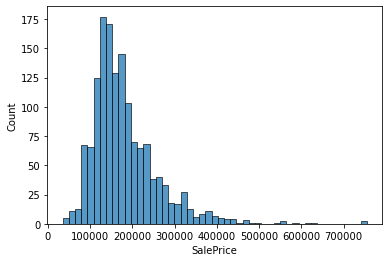

In [7]:
sns.histplot(x='SalePrice', data=train)

As expected this data is highly skewed and we'll **at least** want to apply the log transformation. Given our metric RMSE is meant to punish huge deviations from the mean like the 700000 we see in the above histogram, I would not consider removing outliers here even if it meant arriving at a better score to allow for better robustness of our model overall.

One thing to also keep in mind is that this is not solely my decision to make. At least this feels like something I'd be working out with others on the team to ensure it would be a good idea. In the meantime, let's keep moving forward with my personal judgement.

In [8]:
import numpy as np
train['SalesPriceLog'] = np.log(train['SalePrice'])

<AxesSubplot:xlabel='SalesPriceLog', ylabel='Count'>

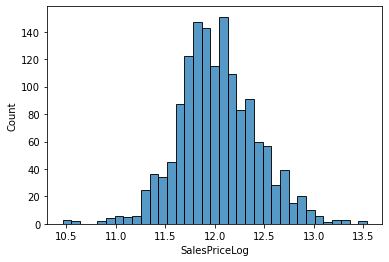

In [9]:
sns.histplot(x='SalesPriceLog', data=train)

That did really well to de-skew the data. Let's drop the SalePrice column and continue along.

In [10]:
train.drop('SalePrice', axis=1, inplace=True)

<AxesSubplot:>

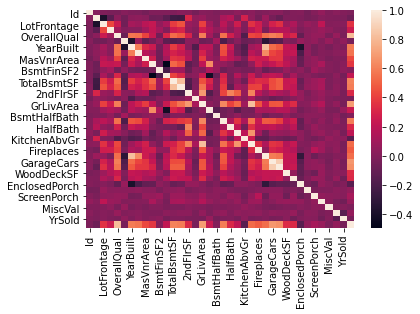

In [11]:
sns.heatmap(train.corr())

Based on the dimensionality of this data, I can't see how any predictor variable relate to my response variable. It would probably help at this point to see what others think is important to cracking this problem.

[This kaggle notebook](https://www.kaggle.com/qaisar95/advance-feature-engineering-top) gave me an idea of breaking down the correlation plot like we have shown above into a single column of correlation. Let's use it here and see what we get.

In [12]:
pd.get_dummies(train, drop_first=True).corr()['SalesPriceLog'].sort_values(ascending=False)[:10]

SalesPriceLog    1.000000
OverallQual      0.817184
GrLivArea        0.700927
GarageCars       0.680625
GarageArea       0.650888
TotalBsmtSF      0.612134
1stFlrSF         0.596981
FullBath         0.594771
YearBuilt        0.586570
YearRemodAdd     0.565608
Name: SalesPriceLog, dtype: float64

My first thought on seeing this correlation column above is to make an arbitrary cutoff to begin wrapping my head around what's going on in this data. The thing is though is that I looked over the data and that's just too much information to keep track of. I do know though that a RandomForestRegressor or a GradientBoostedRegressor would be a perfect match to figuring out this problem as they could figure out the optimal number of features to use inside of the model and then let me know how things should be handled. If there's too many features getting included, I can still drop them out based on the coefficients and see just where my results end up. To save stress on my poor computer (I've got a Lenovo Thinkpad L13 with i3 processor.), I'm going to pull in hyperopt for an informative search over the hyperparameter search space for number of features. 

In [13]:
from hyperopt import fmin, tpe, hp
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score

## Moving along
As far as I can gather from my hyperopt experiment above, it looks like this is something meant to be used in the hyperparameter tuning process later on down the line and it seems like I'm trying to shortcut the harder work of reviewing, understanding, and using the most relevant features in my analysis. Now it is time to understand my own shortcomings here and tackle the harder work.

With this problem in particular, I was attempting to reduce the problem space based on my prior mathematics training **before** I really start getting into doing exploratory data analysis. I think that's been a tough thing coming from my mathematics training is that context evolves and shifts over time, it doesn't just stay stable. This is probably where reviewing how other people are handling the data becomes a good idea so I know what I'll need to do in order to progress

I have looked through a few more references:
- https://www.kaggle.com/mitramir5/missing-values-ordinal-data-and-stories
- https://www.kaggle.com/c/house-prices-advanced-regression-techniques/discussion/23849
- https://www.researchgate.net/post/Which-statistical-test-will-be-the-most-appropriate-to-find-association-between-a-numerical-variable-and-a-categorical-variable

about finding correlations between categorical variables and numerical features is to do one-hot encoding as expected. This makes sense, I was just hoping to save myself a lot of work before getting started. As a **proxy only since I lack a business SME**, I'm going to step back and use the top variables from my correlation analysis and cross reference those with both the data description and my own mathematical training to ensure the results I'm getting do make sense.

## Stepping back and relying on my training
Since I was having a lot of trouble, I took a step back and used the correlation matrix after encoding all categorical variables in my training dataset as a way to just get started. The following pieces of information:
1. OverallQual: Rates the overall material and finish of the house

       10       Very Excellent
       9        Excellent
       8        Very Good
       7        Good
       6        Above Average
       5        Average
       4        Below Average
       3        Fair
       2        Poor
       1        Very Poor

2. GrLivArea: Above grade (ground) living area square feet
3. GarageCars: Size of garage in car capacity
4. GarageArea: Size of garage in square feet
5. TotalBsmtSF: Total square feet of basement area
6. 1stFlrSF: First Floor square feet
7. FullBath: Full bathrooms above grade
8. YearBuilt: Original construction date

contain one ordinal column and numerous continuous variables inside of the dataframe. Overall, though, when I think of buying a house, these are the minimum characteristics I would be thinking of to include inside of my analysis.

I ran this by my wife as a second pair of eyes before continuing on and she thought it was decently complete. I'm also realizing how helpful it could be based on problem context to reach out to friends within my network to help with unfamiliar domain areas. I don't know that this would translate the best to help with enterprise tasks, but at least ensuring a domain expert is available that I could rely on would be very helpful.

In [31]:
base_train = train[['SalesPriceLog', 
                    'OverallQual', 
                    'GrLivArea', 
                    'GarageCars', 
                    'GarageArea', 
                    'TotalBsmtSF', 
                    '1stFlrSF', 
                    'FullBath', 
                    'YearBuilt']].copy()

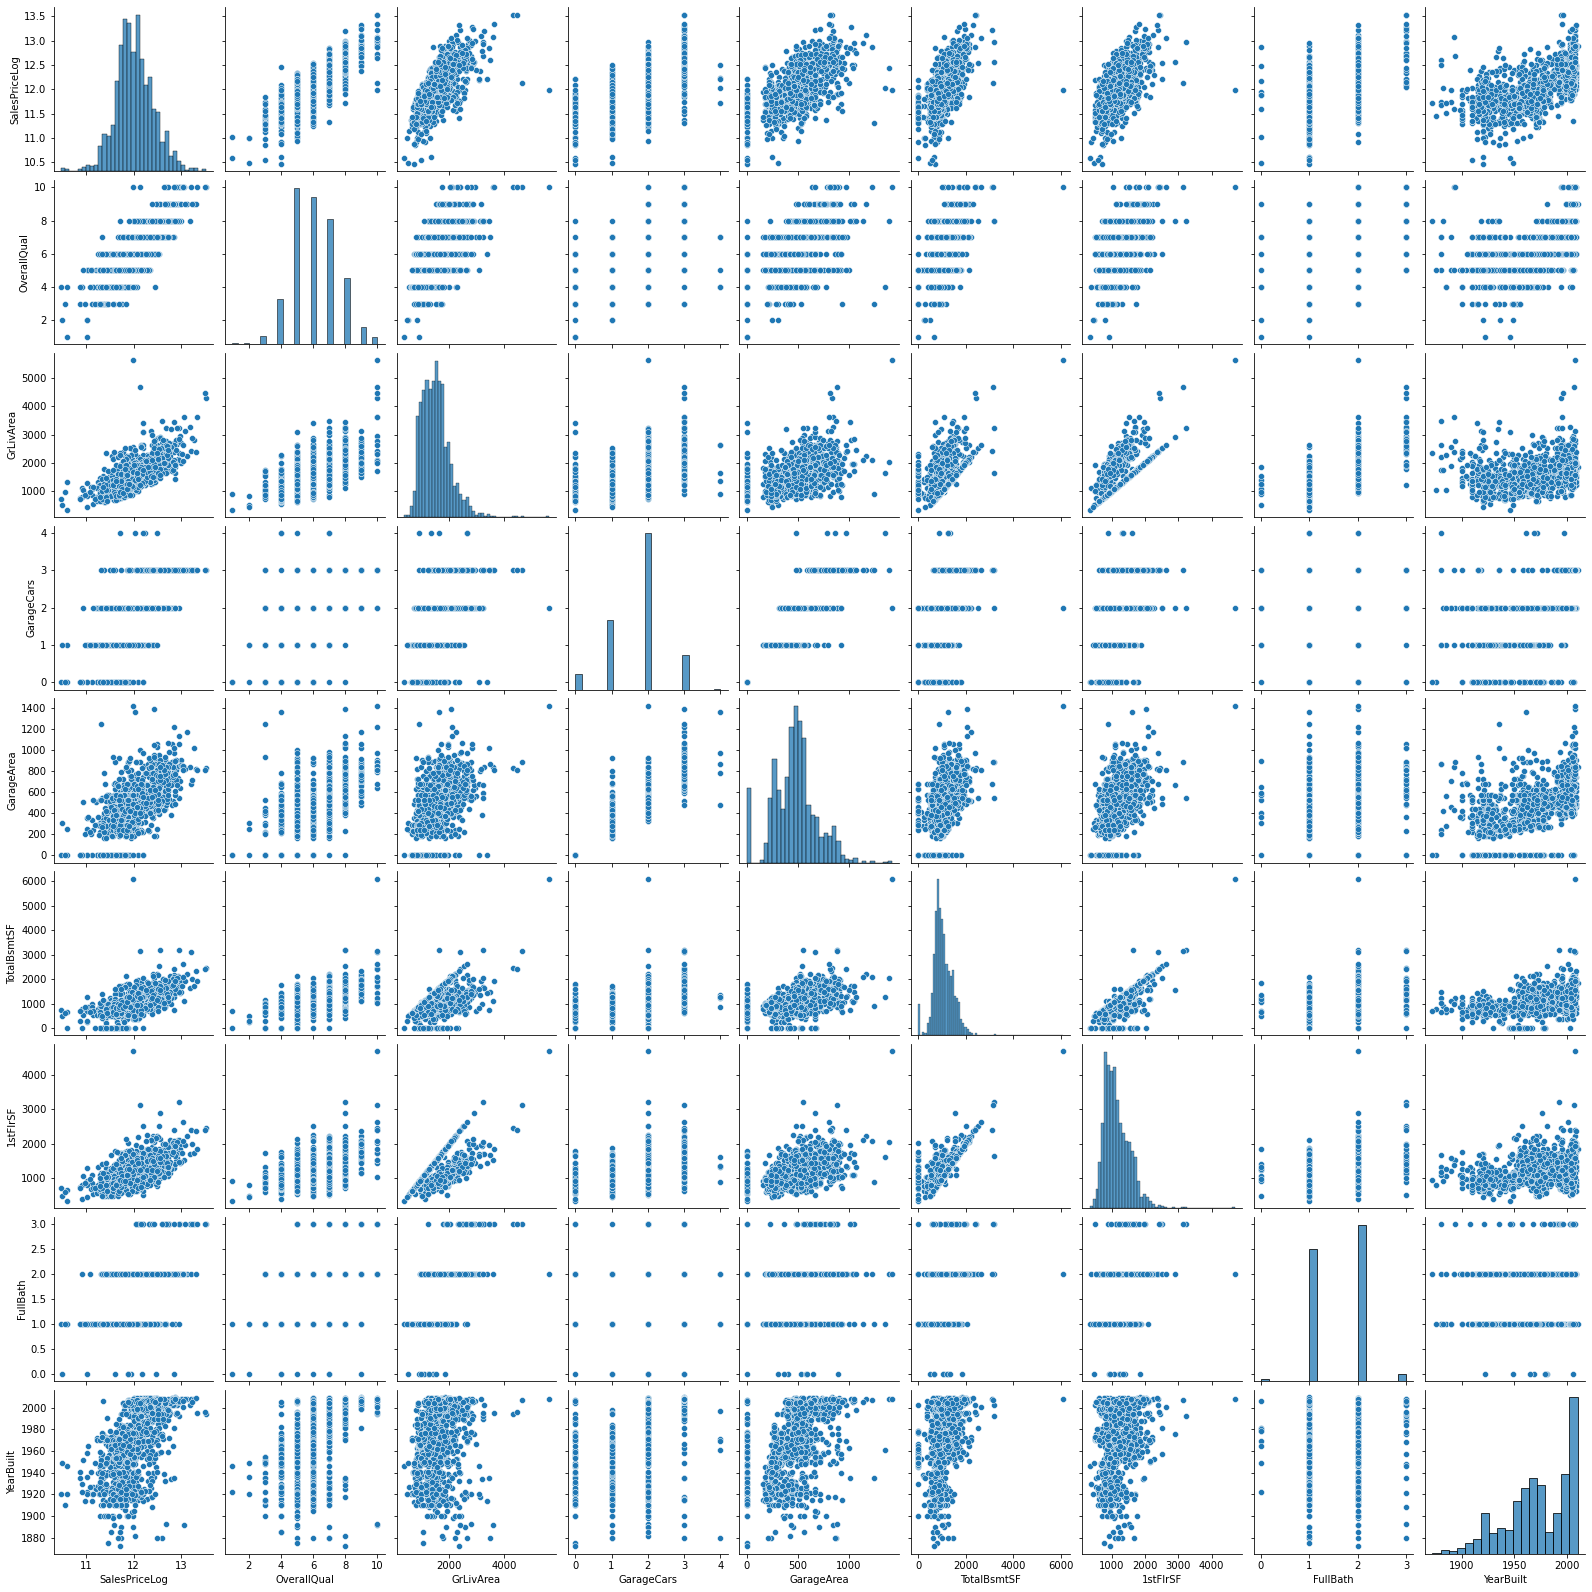

In [32]:
sns.pairplot(base_train)

Reviewing the above output, I've managed to gather the above qualities from the data:
1. Most features vary linearly with the log of sales price, but it seems like there's a non-linear component to it as well.
2. OverallQual is a discrete ordinal column (heavily implied by the data definition sheet provided by kaggle) where bigger numbers are better.
3. GarageCars and FullBath are two discrete, numerical pieces of data which have a good normal distribution.
4. GRLivArea, TotalBSMTSF, and 1stFlrSF are three continuous variables with heavy right skew that could make use of a log transformation to reduce scale and get rid of skew.
5. GarageArea is a continuous variable with moderate right skew that could use a log transformation to reduce scale and get rid of skew.
6. YearBuilt is a variable with strong left skew and I would rely on mean centering in order to bring it into line with the other variables.

In [44]:
from sklearn.preprocessing import StandardScaler
base_train['GrLivAreaLog'] = np.log(base_train['GrLivArea'])

In [45]:
base_train.describe()

,SalesPriceLog,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,YearBuilt,GrLivAreaLog
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,12.024051,6.099315,1515.463699,1.767123,472.980137,1057.429452,1162.626712,1.565068,1971.267808,7.267774
std,0.399452,1.382997,525.480383,0.747315,213.804841,438.705324,386.587738,0.550916,30.202904,0.333550
min,10.460242,1.000000,334.000000,0.000000,0.000000,0.000000,334.000000,0.000000,1872.000000,5.811141
25%,11.775097,5.000000,1129.500000,1.000000,334.500000,795.750000,882.000000,1.000000,1954.000000,7.029530
50%,12.001505,6.000000,1464.000000,2.000000,480.000000,991.500000,1087.000000,2.000000,1973.000000,7.288928
75%,12.273731,7.000000,1776.750000,2.000000,576.000000,1298.250000,1391.250000,2.000000,2000.000000,7.482541
max,13.534473,10.000000,5642.000000,4.000000,1418.000000,6110.000000,4692.000000,3.000000,2010.000000,8.637994


In [48]:
base_train.drop('GrLivArea', axis=1, inplace=True)

I'm stuck in my analysis right now because of zeros in two of the columns that I would want to perform a log transform on. As long as the value is non-zero, but infinitely small I should be able to proceed with the analysis without overly affecting the final result. Even then too, the number of samples are **hopefully still small enough that my data engineer would be ok with me making these modifications.** Any cleaning that would do in this notebook would have to be replicated by them as well and that's something I would want to make sure they are ok with.

In [67]:
base_train.loc[base_train['GarageArea'] == 0, 'GarageArea'] = 1e-100

<AxesSubplot:xlabel='GarageArea', ylabel='Count'>

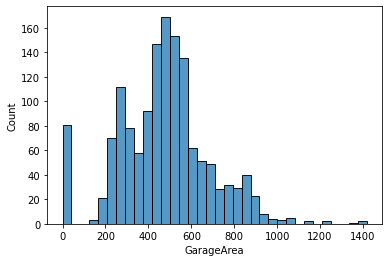

In [69]:
sns.histplot(x='GarageArea', data=base_train)

Based on this histogram plot, it looks like we're preserving the overall distribution, so I should still be ok to proceed so long as I talk with my data engineer to get the ok.

In [70]:
base_train['GarageAreaLog'] = np.log(base_train['GarageArea'])
base_train.drop('GarageArea', axis=1, inplace=True)

In [71]:
base_train['GarageAreaLog'].describe()

count    1460.000000
mean       -6.968632
std        54.136255
min      -230.258509
25%         5.812607
50%         6.173786
75%         6.356108
max         7.257003
Name: GarageAreaLog, dtype: float64

<AxesSubplot:xlabel='GarageAreaLog', ylabel='Count'>

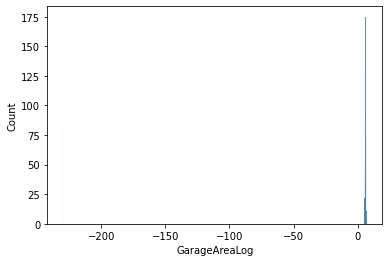

In [73]:
sns.histplot(x='GarageAreaLog', data=base_train)

In [74]:
base_train.GarageAreaLog.value_counts()

-230.258509    81
 6.086775      49
 6.356108      47
 5.480639      38
 6.182085      34
               ..
 6.393591       1
 6.318968       1
 5.733341       1
 6.603944       1
 6.800170       1
Name: GarageAreaLog, Length: 441, dtype: int64

This looks interesting. It looks like I might be stumbling upon a time where these values are actively negatively affecting a model. I'm still not sure if this means I should use a mean centering approach here as opposed to the log transform, but I'm hoping to keep the explanatory power offered by the log transform. If this breaks down, I'll keep in mind that this is often an iterative process and will need to spend more time on it anyways.

In [76]:
base_train = base_train.loc[base_train.GarageAreaLog > 0]

In [77]:
base_train = base_train.loc[base_train.TotalBsmtSF > 0]

In [79]:
base_train['TotalBsmtSFLog'] = np.log(base_train['TotalBsmtSF'])
base_train['1stFlrSFLog'] = np.log(base_train['1stFlrSF'])

In [80]:
base_train.describe()

,SalesPriceLog,OverallQual,GarageCars,TotalBsmtSF,1stFlrSF,FullBath,YearBuilt,GrLivAreaLog,TotalBsmtSFLog,1stFlrSFLog,GarageAreaLog
count,1349.000000,1349.000000,1349.000000,1349.000000,1349.000000,1349.000000,1349.000000,1349.000000,1349.000000,1349.000000,1349.000000
mean,12.065460,6.226835,1.873981,1098.340252,1177.445515,1.578947,1973.249815,7.286616,6.938972,7.021180,6.149050
std,0.376735,1.326121,0.633262,410.359283,388.265164,0.548022,29.569322,0.322147,0.356079,0.314145,0.379708
min,10.471950,2.000000,1.000000,105.000000,438.000000,0.000000,1880.000000,6.082219,4.653960,6.082219,5.075174
25%,11.813030,5.000000,1.000000,822.000000,894.000000,1.000000,1956.000000,7.059618,6.711740,6.795706,5.940171
50%,12.040608,6.000000,2.000000,1024.000000,1099.000000,2.000000,1976.000000,7.301148,6.931472,7.002156,6.182085
75%,12.301383,7.000000,2.000000,1328.000000,1416.000000,2.000000,2002.000000,7.491088,7.191429,7.255591,6.368187
max,13.534473,10.000000,4.000000,6110.000000,4692.000000,3.000000,2010.000000,8.637994,8.717682,8.453614,7.257003


In [84]:
transformed_data = StandardScaler().fit_transform(base_train['YearBuilt'].values.reshape(-1,1))

In [85]:
transformed_data.shape

(1349, 1)

In [86]:
transformed_data

array([[ 1.0064897 ],
       [ 0.09304255],
       [ 0.93882695],
       ...,
       [-1.0910556 ],
       [-0.78657322],
       [-0.27910258]])

<AxesSubplot:ylabel='Count'>

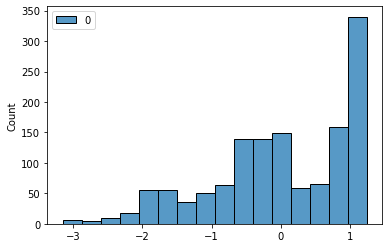

In [87]:
sns.histplot(transformed_data)

<ipython-input-89-30a7b132cf68>:1: RuntimeWarning: invalid value encountered in log
  sns.histplot(np.log(transformed_data))


<AxesSubplot:ylabel='Count'>

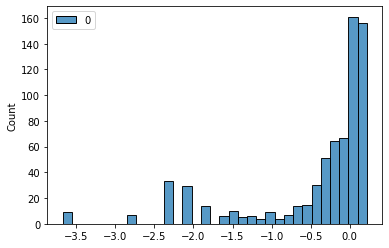

In [89]:
sns.histplot(np.log(transformed_data))

It looks like the log transform of our data could not do much to deskew the data we're showing here. Since this is so bad, it's probably honestly not worth having in the model. This would be another talk with my data engineer, but I don't know how we would be getting around this error honestly. Let's move forward assuming my data engineer and other team members oked the dropping of this and see what we can get.

In [90]:
skew_check = base_train.copy()

In [91]:
skew_check.drop(['TotalBsmtSF', '1stFlrSF', 'YearBuilt'], axis=1, inplace=True)

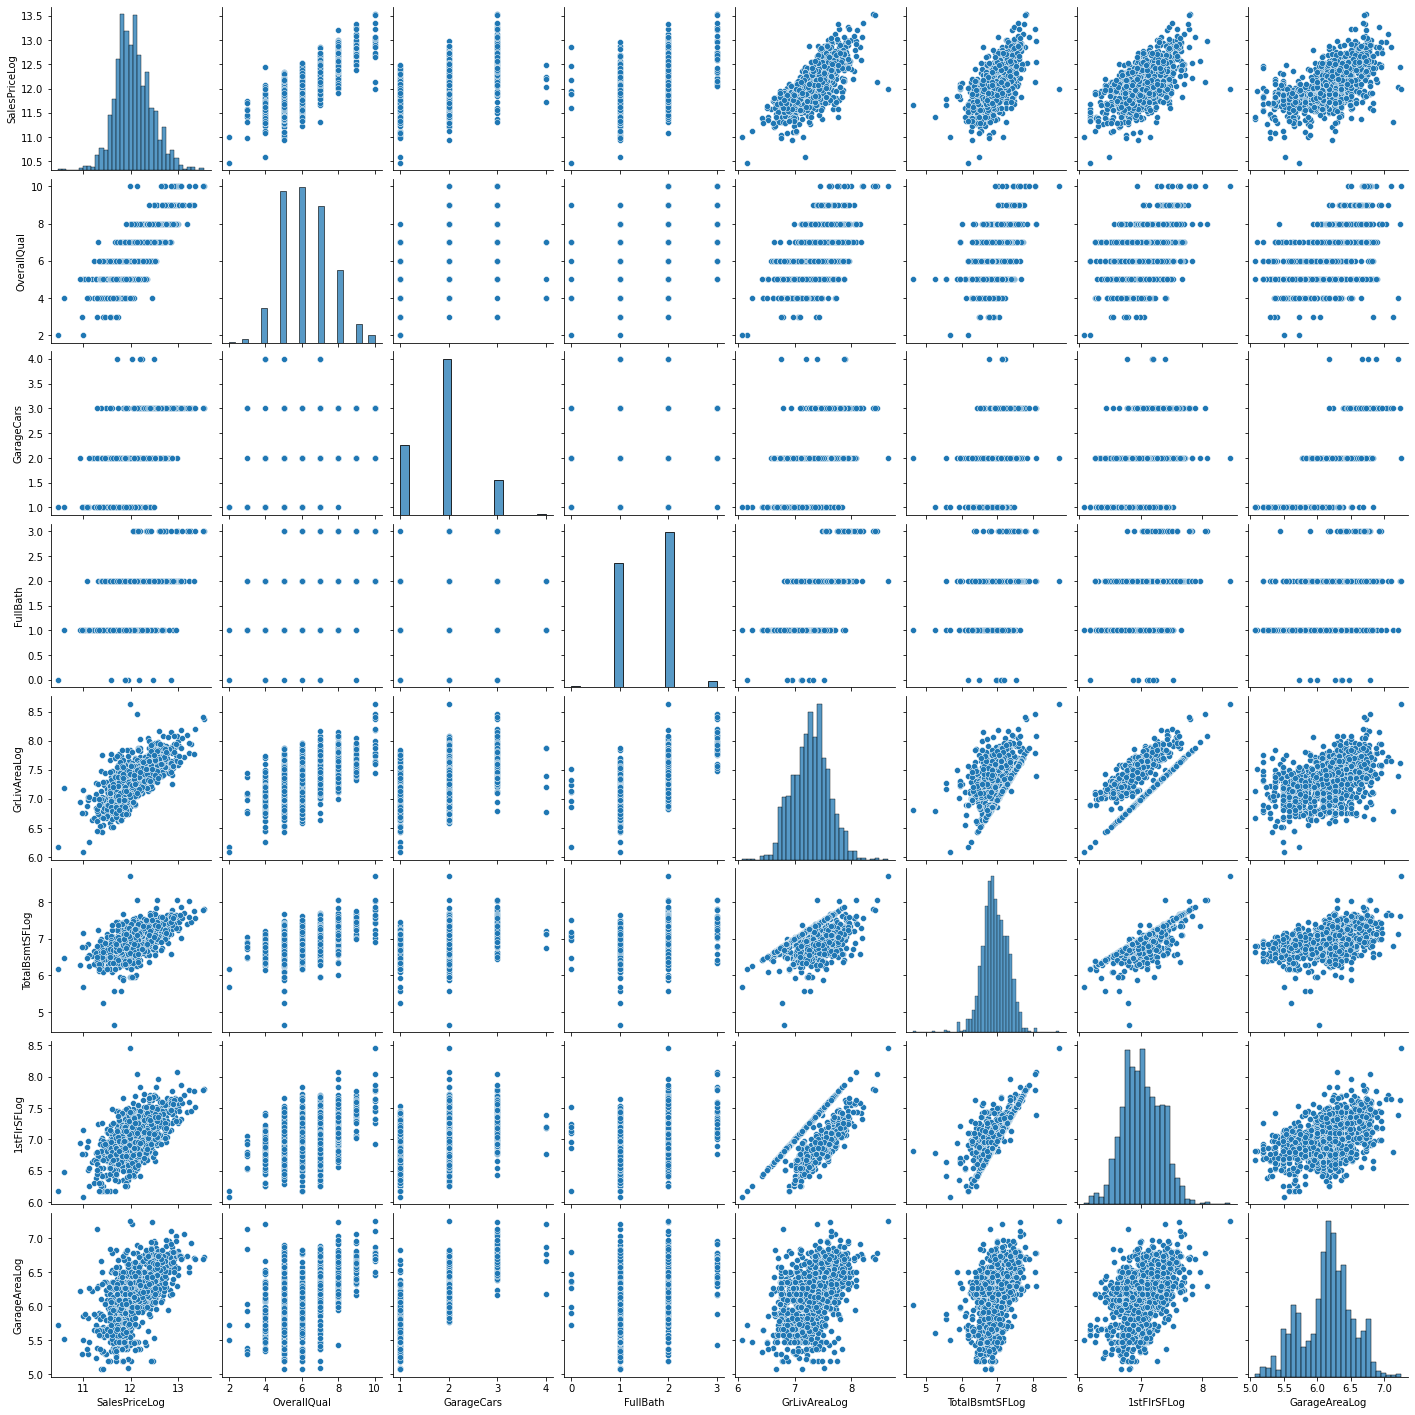

In [92]:
sns.pairplot(skew_check)

Reviewing the above dataframe, the distributions have been as transformed as I can get them to be. Talking with researchers like my father-in-law, they try to keep their work as linear as possible and that was what I wanted to experiment with here in this kaggle competition (he works on RNA folding as a physical experimentalist, which is a sister problem to the protein folding problem recently solved by Google Deepmind.).

At this point, we can still see some non-linearity in the data so I think something like a Gradient boosted regressor would be perfect to help capture non-linearities in pricing data. Unfortunately, I lack the expertise to explain what 2nd order and 3rd order derivatives of elasiticities and growth rates are, but I'm sure an economist or other person would be highly interested in discussing what these effects are.

Anyways, let's keep going with a gradient boosting classifier and see what we can get.

## Bayesian hyperparameter tuning
[Following this reference](https://campus.datacamp.com/courses/hyperparameter-tuning-in-python/informed-search?ex=6), I wanted to set up a bayesian hyper parameter tuning experiment and see how that would impact my results.

In [93]:
skew_predictor = skew_check[['SalesPriceLog']]
skew_check.drop('SalesPriceLog', axis=1, inplace=True)

In [98]:
skew_predictor['SalesPriceLog'].to_numpy().shape

(1349,)

In [107]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(skew_check, skew_predictor, test_size=.3, random_state=42)

In [108]:
type(x_train)

pandas.core.frame.DataFrame

In [117]:
y_train

,SalesPriceLog
12,11.877569
585,12.820988
190,12.660328
651,11.589887
1342,12.339291
...,...
1188,12.180755
1226,12.273731
1400,11.695247
929,12.310433


In [109]:
space = {'max_depth': hp.quniform('max_depth', 2, 12, 2), 'n_estimators': hp.quniform('n_estimators', 50, 70, 5)}

# Objective function that hyperopt will minimize.
def objective(params):
    params = {'max_depth': int(params['max_depth']),
              'n_estimators': int(params['n_estimators'])}
    gbm_reg = GradientBoostingRegressor(**params)
    best_score = cross_val_score(gbm_reg, x_train, y_train['SalesPriceLog'].to_numpy(), scoring='neg_root_mean_squared_error', cv=4).mean()
    return best_score

best = fmin(fn=objective, 
            space=space, 
            max_evals=50, 
            rstate=np.random.RandomState(42),
            algo=tpe.suggest)

100%|██████████| 50/50 [00:20<00:00,  2.43trial/s, best loss: -0.21817034247451472]


In [110]:
best

{'max_depth': 12.0, 'n_estimators': 65.0}

Seeing as I mostly had this working anyways, I decided to experiment with it and I was able to get this working :) This feels really good and now I can clean up the test data, instantiate a GradientBoostingRegressor with the above params and get my first submission over to kaggle. This feels really good :)

## Predicting against the holdout data
Now let's instantiate a predictor and see how we do on the holdout data.

In [113]:
y_val

,SalesPriceLog
316,12.468437
1124,12.007012
581,12.442302
377,12.736701
1166,12.410441
...,...
346,11.928341
1130,11.813030
87,12.010666
142,12.019743


In [119]:
gbm_reg = GradientBoostingRegressor(max_depth=12, n_estimators=65)
gbm_reg.fit(x_val, y_val['SalesPriceLog'].to_numpy())
predictions = gbm_reg.predict(x_val)

In [120]:
type(predictions)

numpy.ndarray

In [121]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_val['SalesPriceLog'].to_numpy(), predictions, squared=False)

0.00791575467933249

## Cleaning the test data and instantiating an estimator

Let's check the test data status.

In [139]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [130]:
base_test = test[['Id',
                  'OverallQual', 
                  'GrLivArea', 
                  'GarageCars', 
                  'GarageArea', 
                  'TotalBsmtSF', 
                  '1stFlrSF', 
                  'FullBath']].copy()

In [131]:
base_test = base_test[base_test['GarageArea'] > 0]
base_test = base_test[base_test['TotalBsmtSF'] > 0]

In [132]:
base_test['GrLivAreaLog'] = np.log(base_test['GrLivArea'])
base_test['GarageAreaLog'] = np.log(base_test['GarageArea'])
base_test['TotalBsmtSFLog'] = np.log(base_test['TotalBsmtSF'])
base_test['1stFlrSFLog'] = np.log(base_test['1stFlrSF'])

In [133]:
base_test.drop(['GrLivArea', 'GarageArea', 'TotalBsmtSF', '1stFlrSF'], axis=1, inplace=True)

In [135]:
predictions = gbm_reg.predict(base_test[['OverallQual', 
                                         'GrLivAreaLog', 
                                         'GarageCars',
                                         'GarageAreaLog',
                                         'TotalBsmtSFLog',
                                         '1stFlrSFLog',
                                         'FullBath']].values)

In [136]:
sub_csv_df = pd.DataFrame({'Id': base_test.Id, 'SalePrice': np.exp(predictions)})

In [145]:
sub_csv_df.to_csv('submission.csv', index=False)

In [146]:
mean_squared_error(skew_predictor, predictions, squared=False)

ValueError: Found input variables with inconsistent numbers of samples: [1349, 1347]

After looking through a couple more resources attempting to understand how to move forward on this problem:
1. https://www.kaggle.com/mitramir5/anomaly-detection-skewed-features-and-stories
2. https://www.kaggle.com/itokianarafidinarivo/house-prices-gradientboostingregressor

I don't know how to move forward here. I'll touch base with a couple people on kaggle and get their thoughts on the matter.